#### Makarova Evgeniia
#### Alejandro Pereña López

# Practica 1. Naive-Bayes

## Apartado 1: Particionado
Análisis de las dos estrategias de particionado propuestas: simple, y cruzada, para los conjuntos propuestos: german y tic-tac-toe. El análisis consiste en una descripción de los índices de train y test devueltos por cada uno de los métodos de particionado, junto con un comentario sobre las ventajas/desventajas de cada uno de ellos.

In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

from datos import *
from EstrategiaParticionado import *
#from Clasificador import *

#Este hay que cambiar a funciones de clasificador
from naive_bayes_functions import *


Simple validation assert: 0.3
Cross validation assert: [0.732, 0.748, 0.752, 0.748]


__Validación simple__: Este metodo de particionado divide los datos en 2 partes dada la proporción de datos test y train. Antes de la división los ids de las filas están mezcladas de manera aleatoria para asegurarse que los datos en train and test no esten en el mismo orden que  en el conjunto de datos original (por si están ordenados por clases o algún atributo.

__Ventajas__: Implementación simple y rápida

__Desventajas__: Si el conjunto de datos es pequeño quedan pocos datos para la validación. 

In [17]:
dataset=Datos('./ConjuntosDatos/tic-tac-toe.data') 

rows_number=dataset.datos.shape[0]

#Simple validation
test_proportion=0.3
line_ids=validacion_simple(rows_number,test_proportion)
line_ids_test=line_ids['Test']
line_ids_train=line_ids['Train']

print("Test: ", line_ids_test)

Test:  [0, 2, 3, 4, 5, 6, 10, 14, 16, 24, 26, 27, 29, 34, 37, 39, 48, 52, 55, 56, 60, 62, 66, 68, 71, 72, 78, 80, 81, 84, 95, 96, 97, 99, 100, 103, 104, 106, 107, 109, 117, 119, 120, 121, 128, 130, 131, 132, 135, 136, 137, 138, 141, 147, 149, 151, 154, 160, 166, 167, 171, 185, 192, 197, 204, 210, 215, 223, 228, 232, 236, 237, 238, 240, 241, 247, 251, 252, 253, 257, 258, 261, 263, 271, 274, 277, 279, 281, 284, 289, 292, 294, 296, 300, 306, 311, 312, 313, 321, 322, 323, 324, 327, 338, 339, 344, 356, 358, 360, 363, 364, 367, 368, 374, 378, 387, 390, 393, 395, 396, 399, 403, 410, 411, 413, 421, 422, 428, 432, 437, 439, 440, 442, 445, 454, 463, 465, 466, 469, 473, 480, 482, 488, 490, 491, 493, 504, 506, 507, 508, 509, 515, 516, 517, 521, 522, 526, 536, 538, 541, 548, 550, 552, 553, 557, 566, 569, 571, 574, 576, 581, 582, 589, 590, 591, 592, 593, 599, 616, 617, 618, 623, 626, 629, 633, 634, 636, 638, 641, 646, 651, 655, 656, 658, 661, 666, 667, 670, 675, 676, 684, 687, 690, 694, 696, 700, 70

Para extraer los datos se utiliza el metodo extraeDatos:

In [16]:
train=dataset.extraeDatos(line_ids_train)
test=dataset.extraeDatos(line_ids_test)
print(test)

[['x' 'x' 'x' ... 'o' 'x' 'positive']
 ['x' 'x' 'x' ... 'b' 'o' 'positive']
 ['x' 'x' 'x' ... 'o' 'b' 'positive']
 ...
 ['x' 'o' 'x' ... 'x' 'o' 'negative']
 ['o' 'x' 'x' ... 'x' 'x' 'negative']
 ['o' 'x' 'o' ... 'o' 'x' 'negative']]


__Validación cruzada__: En este tipo de validación el conjunto de datos de divide de manera aleatoria en N grupos, y uno de los grupos se utiliza para test y otros N-1 para train. De esta manera generamos N diferentes subconjuntos de train/test.
![alt text](K-fold_cross_validation.jpg "K-Fold Cross Validation")

__Ventajas__:Se utiliza el conjunto completo de datos para entrenamiento y para la validación y se puede generar más metricas para ver si el modelo el robusto.

__Desventajas__: El algoritmo hay que repetir N veces, lo que conlleva mayor coste computacional.

In [21]:
partitions=4
line_ids=validacion_cruzada(rows_number,partitions)
print("Test ids con segundo grupo asignado como test y train el resto:")
print(line_ids[1]['Test'])

Test ids con segundo grupo asignado como test y train el resto:
[1, 2, 3, 4, 13, 18, 31, 34, 39, 41, 48, 50, 57, 61, 65, 66, 69, 72, 74, 75, 89, 91, 93, 94, 98, 101, 105, 109, 112, 120, 127, 128, 129, 130, 138, 139, 158, 161, 169, 173, 175, 178, 182, 184, 185, 191, 193, 195, 199, 202, 204, 206, 210, 214, 220, 221, 223, 226, 236, 238, 239, 241, 243, 245, 246, 248, 251, 256, 259, 265, 278, 280, 286, 287, 291, 292, 295, 296, 301, 304, 310, 314, 326, 332, 335, 336, 338, 343, 350, 355, 356, 358, 360, 364, 365, 367, 368, 370, 380, 389, 390, 395, 397, 398, 408, 409, 412, 414, 416, 422, 428, 430, 435, 437, 441, 442, 447, 449, 450, 453, 455, 467, 470, 472, 473, 474, 476, 480, 482, 484, 489, 497, 504, 507, 512, 513, 514, 517, 523, 535, 536, 547, 552, 553, 556, 568, 571, 572, 581, 593, 594, 595, 602, 604, 606, 617, 621, 623, 630, 633, 636, 638, 639, 645, 646, 647, 652, 662, 666, 668, 675, 676, 683, 688, 694, 697, 698, 702, 707, 708, 713, 726, 729, 731, 737, 738, 742, 745, 748, 754, 756, 759, 761,

## Apartado 2: Naive-Bayes
Tabla con los resultados de la ejecución para los conjuntos de datos analizados (tic-tac-toe y german). Considerar los dos tipos de particionado.
Los resultados se refieren a las tasas de error/acierto y deben incluirse tanto con la corrección de Laplace como sin ella. Se debe incluir tanto el promedio de error para las diferentes particiones como su desviación típica. Es importante mostrar todos los resultados agrupados en una tabla para facilitar su evaluación.
Breve análisis de los resultados anteriores.

In [17]:
tictac=Datos('./ConjuntosDatos/tic-tac-toe.data') 

rows_tictac=tictac.datos.shape[0]

test_proportion=0.3

line_ids_tic=validacion_simple(rows_tictac,test_proportion)
line_ids_test_tic=line_ids_tic['Test']
line_ids_train_tic=line_ids_tic['Train']

train_tic=tictac.extraeDatos(line_ids_train_tic)
test_tic=tictac.extraeDatos(line_ids_test_tic)

print("Tic tac toe error, laplace =True", validacion(test_tic,tictac,train_tic, True))
print("Tic tac toe error, laplace =False", validacion(test_tic,tictac,train_tic, False))


german=Datos('./ConjuntosDatos/german.data') 

rows_german=german.datos.shape[0]

test_proportion=0.3
#Aqui tienen que estar las funciones de validacion de clasificador
line_ids_german=validacion_simple(rows_german,test_proportion)
line_ids_test_german=line_ids_german['Test']
line_ids_train_german=line_ids_german['Train']

train_german=german.extraeDatos(line_ids_train_german)
test_german=german.extraeDatos(line_ids_test_german)


print("German error, laplace=True", validacion(test_german,german,train_german, True))
print("German error, laplace=False", validacion(test_german,german,train_german, False))

Tic tac toe error, laplace =True 0.344
Tic tac toe error, laplace =False 0.344
German error, laplace=True 0.272
German error, laplace=False 0.272


In [40]:
##Cruzada
partitions=4
#Tic tac
line_ids_tic=validacion_cruzada(rows_tictac,partitions)
assert_cross_tictac=[]
assert_cross_tictac_laplace=[]
for i in range(partitions):
    line_ids_test=line_ids_tic[i]['Test']
    line_ids_train=line_ids_tic[i]['Train']
    train=tictac.extraeDatos(line_ids_train)
    test=tictac.extraeDatos(line_ids_test)
    assert_cross_tictac.append(validacion(test,tictac,train, False))
    assert_cross_tictac_laplace.append(validacion(test,tictac,train, True))
print("Tic-tac-toe")
print("Without laplace", assert_cross_tictac, "Mean: ", np.mean(assert_cross_tictac), "Std:", np.std(assert_cross_tictac))
print("With Laplace", assert_cross_tictac_laplace, "Mean: ", np.mean(assert_cross_tictac_laplace), "Std:", np.std(assert_cross_tictac_laplace))



line_ids_german=validacion_cruzada(rows_german,partitions)
assert_cross_german=[]
assert_cross_german_laplace=[]
for i in range(partitions):
    line_ids_test=line_ids_german[i]['Test']
    line_ids_train=line_ids_german[i]['Train']
    train=german.extraeDatos(line_ids_train)
    test=german.extraeDatos(line_ids_test)
    assert_cross_german.append(validacion(test,german,train, False))
    assert_cross_german_laplace.append(validacion(test,german,train, True))
print("German")
print("Without laplace", assert_cross_german, "Mean: ", np.mean(assert_cross_german), "Std:", np.std(assert_cross_german))
print("With Laplace", assert_cross_german_laplace, "Mean: ", np.mean(assert_cross_german_laplace), "Std:", np.std(assert_cross_german_laplace))

Tic-tac-toe
Without laplace [0.316, 0.284, 0.256, 0.26] Mean:  0.279 Std: 0.023895606290697036
With Laplace [0.316, 0.284, 0.256, 0.26] Mean:  0.279 Std: 0.023895606290697036
German
Without laplace [0.284, 0.24, 0.244, 0.26] Mean:  0.257 Std: 0.01729161646579058
With Laplace [0.284, 0.24, 0.244, 0.26] Mean:  0.257 Std: 0.01729161646579058


__Error con validación simple__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Error (Laplace)| 0.344| 0.272|
|Error (Sin Laplace)| 0.344| 0.272|

__Error con validación cruzada__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Mean Error| 0.279 | 0.257|
|Std| 0.0239| 0.0172|


El error aplicando y no aplicando Laplace para estos conjuntos de datos es igual, no influye mucho a la precisión de clasificador. 
El error de validación cruzada es más bajo porque hemos utilzado más datos para entrenamiento en cada de sus iteraciones (75% vs 70% en validación simple).

## Apartado 3: Scikit-Learn
Incluir los mismos resultados que en el apartado 2 pero usando los métodos del paquete scikit-learn. Comparar y analizar los resultados.

In [60]:
#bayes type = gaussian or multinomial
def error_sklearn_bayes(train, test, bayes_type):
    #Preparando los datos conviertiendo datos categoricos a numericos
    le = preprocessing.LabelEncoder()

    train_a=np.empty([train.shape[0], train.shape[1]])
    test_a=np.empty([test.shape[0], test.shape[1]])
    for i in range(train.shape[1]):
        train_column=train[:,i]
        train_column=le.fit_transform(train_column)
        train_a[:,i]=np.transpose(train_column)
    for i in range(test.shape[1]):    
        test_column=test[:,i]
        test_column=le.fit_transform(test_column)
        test_a[:,i]=np.transpose(test_column)


    input_train=[]
    for row in range(train_a.shape[0]):
        input_train.append(train_a[row,0:-1])
    classes_encoded=train_a[:,-1]

    validation=[]
    real_class=[]
    for row in range(test_a.shape[0]):
        validation.append(test_a[row,0:-1])
        real_class.append(test_a[row,-1])


    if bayes_type=="gaussian":
        clf = GaussianNB()
    else:
        clf = MultinomialNB()
            


    clf.fit(input_train, classes_encoded)

    error=0
    for r in range(len(validation)):
        predicted=clf.predict([validation[r]])
        if predicted!=real_class[r]:
            error+=1
    error=error/len(validation)
    #print("Error validación simple:", error)
    #print("Fit score:", clf.score(input_array, classes_encoded))
    return(error)

print("Error validación simple:")
print("Bayes gaussiano:")
print("Tic tac toe:", error_sklearn_bayes(train_tic, test_tic, "gaussian"))
print("German:", error_sklearn_bayes(train_german, test_german , "gaussian"))
print("Bayes multinomial:")
print("Tic tac toe:", error_sklearn_bayes(train_tic, test_tic, "multinomial"))
print("German:", error_sklearn_bayes(train_german, test_german , "multinomial"))

Error validación simple:
Bayes gaussiano:
Tic tac toe: 0.28222996515679444
German: 0.25
Bayes multinomial:
Tic tac toe: 0.3344947735191638
German: 0.24


In [63]:
##Cruzada
partitions=4
#Tic tac
#line_ids_tic=validacion_cruzada(rows_tictac,partitions)
#Utilizamos las mismas particiones que en apartado 2
error_cross_tictac_g=[]
error_cross_tictac_m=[]
for i in range(partitions):
    line_ids_test=line_ids_tic[i]['Test']
    line_ids_train=line_ids_tic[i]['Train']
    train=tictac.extraeDatos(line_ids_train)
    test=tictac.extraeDatos(line_ids_test)
    error_cross_tictac_g.append(error_sklearn_bayes(train, test, "gaussian"))
    error_cross_tictac_m.append(error_sklearn_bayes(train, test, "multinomial"))

#line_ids_german=validacion_cruzada(rows_german,partitions)
error_cross_german_g=[]
error_cross_german_m=[]
for i in range(partitions):
    line_ids_test=line_ids_german[i]['Test']
    line_ids_train=line_ids_german[i]['Train']
    train=german.extraeDatos(line_ids_train)
    test=german.extraeDatos(line_ids_test)
    error_cross_german_g.append(error_sklearn_bayes(train, test,  "gaussian"))
    error_cross_german_m.append(error_sklearn_bayes(train, test,  "multinomial"))
    
print("Error validación cruzada:")
print("Bayes gaussiano")
print("Tic-tac-toe", error_cross_tictac_g, "Mean: ", np.mean(error_cross_tictac_g), "Std:", np.std(error_cross_tictac_g))
print("German", error_cross_german_g, "Mean: ", np.mean(error_cross_german_g), "Std:", np.std(error_cross_german_g))

print("Bayes multinomial")
print("Tic-tac-toe", error_cross_tictac_m, "Mean: ", np.mean(error_cross_tictac_m), "Std:", np.std(error_cross_tictac_m))
print("German", error_cross_german_m, "Mean: ", np.mean(error_cross_german_m), "Std:", np.std(error_cross_german_m))


Error validación cruzada:
Bayes gaussiano
Tic-tac-toe [0.2916666666666667, 0.275, 0.24686192468619247, 0.30962343096234307] Mean:  0.28078800557880057 Std: 0.023099280277892393
German [0.292, 0.268, 0.232, 0.276] Mean:  0.267 Std: 0.021977260975835904
Bayes multinomial
Tic-tac-toe [0.325, 0.3375, 0.3138075313807531, 0.3891213389121339] Mean:  0.3413572175732218 Std: 0.02882201064606139
German [0.3, 0.296, 0.26, 0.272] Mean:  0.28200000000000003 Std: 0.01661324772583614


__Resultados:__


__Error con validación simple__


|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Clasificador de práctica | 0.344| 0.272|
|SKlearn Gaussian|0.282|0.25|
|SKlearn multinomial|0.335|0.24|


__Error con validación cruzada__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
||Error Promedio||
|Clasificador de práctica| 0.279 | 0.257|
|SKlearn Gaussian| 0.281 | 0.267|
|SKlearn multinomial| 0.341 | 0.282|
||Desviación estandar||
|Clasificador de práctica| 0.0239| 0.0172|
|SKlearn Gaussian| 0.0231| 0.022|
|SKlearn multinomial| 0.0288| 0.0166|


## Apartado 4: Evaluación de hipótesis mediante Análisis ROC
__Matriz de confusión__

In [64]:
#positive and negative are the classes names that need to be compared
def confusion_mx(dataset, train, test, laplace, positive, negative):
    confusion_matrix=np.zeros([2,2])
    for r in range(test.shape[0]):
        predicted=naive_bayes(dataset, train, test[r][0:-1], laplace)
        real=test[r][-1]
        if predicted==positive:
            if real==positive:
                confusion_matrix[0,0]+=1
            else: 
                confusion_matrix[0,1]+=1
        else:
            if real==negative:
                confusion_matrix[1,1]+=1
            else: 
                confusion_matrix[1,0]+=1

    return(confusion_matrix)

confusion_matrix_tic=confusion_mx(tictac, train_tic, test_tic, True, "positive", "negative")
print("Confusion matrix")
print("Tic tac toe:")
print(confusion_matrix_tic)
tp=confusion_matrix_tic[0,0]
fn=confusion_matrix_tic[1,0]
fp=confusion_matrix_tic[0,1]
tn=confusion_matrix_tic[1,1]

tpr=round(tp/(tp+fn),2)
fnr=round(fn/(tp+fn),2)
fpr=round(fp/(fp+tn),2)
tnr=round(tn/(fp+tn),2)
print("TPR:", tpr, "FNR: ", fnr, "FPR: ", fpr, "TNR: ", tnr)


confusion_matrix_german=confusion_mx(german, train_german, test_german, True, 1, 2)
print("German:")
print(confusion_matrix_german)
tp=confusion_matrix_german[0,0]
fn=confusion_matrix_german[1,0]
fp=confusion_matrix_german[0,1]
tn=confusion_matrix_german[1,1]

tpr=round(tp/(tp+fn),2)
fnr=round(fn/(tp+fn),2)
fpr=round(fp/(fp+tn),2)
tnr=round(tn/(fp+tn),2)
print("TPR:", tpr, "FNR: ", fnr, "FPR: ", fpr, "TNR: ", tnr)

Confusion matrix
Tic tac toe:
[[161.  58.]
 [ 28.  40.]]
TPR: 0.85 FNR:  0.15 FPR:  0.59 TNR:  0.41
German:
[[192.  39.]
 [ 29.  40.]]
TPR: 0.87 FNR:  0.13 FPR:  0.49 TNR:  0.51


__Matriz de confusión:__

Tic tac toe

||Real||
|----|----|----|
|Clase|Positivo|Negativo|
|Positivo|161|58|
|Negativo|28|40|


|TPR|FNR|FPR|TNR|
|---|---|---|---|
|0.85|0.15|0.59|0.41|


German

||Real||
|----|----|----|
|Clase|1|2|
|1|192|39|
|2|29|40|

|TPR|FNR|FPR|TNR|
|---|---|---|---|
|0.87|0.13|0.49|0.51|


En ambos conjuntos de datos el clasificador tiene un ratio elevado para falsos positivos, tiene errores elevador en clasificación de clase 2 (negativos en tic-tac-toe y 2 en german).

__Curvas ROC__

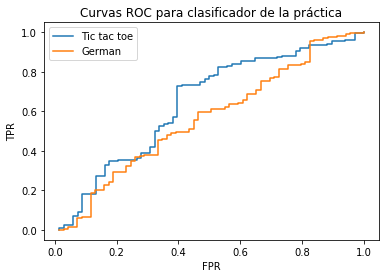

In [87]:
import matplotlib.pyplot as plt
def roc(dataset, train, test, laplace, positive, negative):
    p_counts=[]
    n_counts=[]
    p=0
    n=0
    total=test.shape[0]
    for r in range(total):
        predicted=naive_bayes(dataset, train, test[r][0:-1], laplace)
        real=test[r][-1]
        if predicted==positive:
            p+=1
        else:
            n+=1
        p_counts.append(p)
        n_counts.append(n)
    tpr=np.array(p_counts)/p
    fpr=np.array(n_counts)/n
    return(tpr, fpr)

tpr_tic, fpr_tic = roc(tictac, train_tic, test_tic, True, "positive", "negative")
tpr_german, fpr_german = roc(german, train_german, test_german, True, 1, 2)

plt.figure
plt.plot(fpr_tic, tpr_tic, label="Tic tac toe")
plt.plot(fpr_german, tpr_german, label="German")
plt.title("Curvas ROC para clasificador de la práctica")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

El area debajo de la curva ROC es mayor para el conjunto de datos de tic tac toe, el clasificador discrimina las clases mejor, que para el conjunto de datos german.